In [40]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
#city_data = "data/city_data.csv"
#ride_data = "data/ride_data.csv"

# Read the City and Ride Data using pandas
city_df = pd.read_csv('data/city_data.csv')
ride_df = pd.read_csv('data/ride_data.csv')

In [9]:
#Display top 5 rows of df in order to merge them
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [10]:
#Display top 5 rows of df in order to merge them
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [16]:
# Combine the data into a single dataset

merged_df = pd.merge(ride_df, city_df, how="left", on="city") # left, right, inner, outer


# Display the data table for preview

merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [17]:
merged_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [22]:
# Obtain the x and y coordinates for each of the three city types
# filter dataset into 3 different city types
# Subtotals = 1625+625+125 = 2375

urban_df = merged_df[merged_df["type"] == "Urban"]
suburban_df = merged_df[merged_df["type"] == "Suburban"]
rural_df = merged_df[merged_df["type"] == "Rural"]

urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


Build bubbleplot showcases the relationship between four key variables:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)


In [23]:
# average fare per city, number of rides per city, number of drivers per city
avg_fare_urban = urban_df.groupby('city').mean()["fare"]
ride_count_urban = urban_df.groupby('city').count()["ride_id"]
driver_count_urban = urban_df.groupby('city').mean()["driver_count"]

avg_fare_suburban = suburban_df.groupby('city').mean()["fare"]
ride_count_suburban = suburban_df.groupby('city').count()["ride_id"]
driver_count_suburban = suburban_df.groupby('city').mean()["driver_count"]


avg_fare_rural = rural_df.groupby('city').mean()["fare"]
ride_count_rural = rural_df.groupby('city').count()["ride_id"]
driver_count_rural = rural_df.groupby('city').mean()["driver_count"]

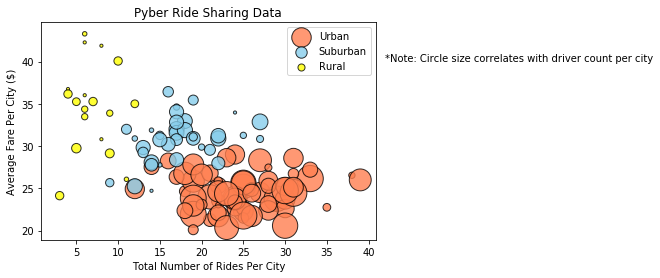

In [37]:
# Build scatter plots for each city types

plt.scatter(x=ride_count_urban, y=avg_fare_urban, s=10 * driver_count_urban, 
            c="coral", marker="o", edgecolor="black",
            linewidth=1, alpha=0.8, label="Urban")

plt.scatter(x=ride_count_suburban, y=avg_fare_suburban, s=10 * driver_count_suburban, 
            c="skyblue", marker="o", edgecolor="black",
            linewidth=1, alpha=0.8, label="Suburban")

plt.scatter(x=ride_count_rural, y=avg_fare_rural, s=10 * driver_count_rural, 
            c="yellow", marker="o", edgecolor="black",
            linewidth=1, alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare Per City ($)')

# Create a legend
plt.legend(loc="best")

# Incorporate a text label regarding circle size
plt.text(s="*Note: Circle size correlates with driver count per city", x=42, y=40)

# Save Figure
plt.savefig("scatter.png", bbox_inches = 'tight')

In [ ]:
# Show plot
plt.show()

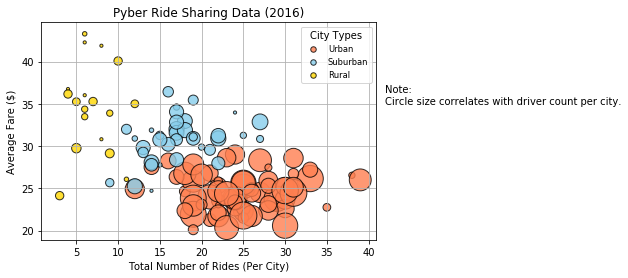

In [3]:
* % of Total Fares by City Type

total_fares = merged_df.groupby('type').sum()["fare"]

* % of Total Rides by City Type
* % of Total Drivers by City Type

# average fare per city, number of rides per city, number of drivers per city
avg_fare_urban = urban_df.groupby('city').mean()["fare"]
ride_count_urban = urban_df.groupby('city').count()["ride_id"]
driver_count_urban = urban_df.groupby('city').mean()["driver_count"]

avg_fare_suburban = suburban_df.groupby('city').mean()["fare"]
ride_count_suburban = suburban_df.groupby('city').count()["ride_id"]
driver_count_suburban = suburban_df.groupby('city').mean()["driver_count"]


avg_fare_rural = rural_df.groupby('city').mean()["fare"]
ride_count_rural = rural_df.groupby('city').count()["ride_id"]
driver_count_rural = rural_df.groupby('city').mean()["driver_count"]

## Total Fares by City Type

In [51]:
total_fares = merged_df.groupby('type').sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

ValueError: 'label' must be of length 'x'

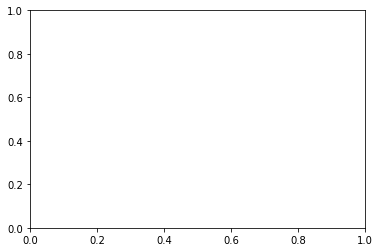

In [53]:
labels = merged_df['type']

plt.pie(x=total_fares, labels=labels, autopct='%1.1f%%')

plt.title('% of Total Fares by City Type')

# Save Figure
plt.show

In [50]:
# Calculate Type Percents

total_fares = merged_df.groupby(['type'])
sum_fares = total_fares['fare'].sum()
sum_fares

# Build Pie Chart

labels = sum_fares['type']

plt.pie(x=sum_fares, labels=labels, autopct='%1.1f%%')

plt.title('% of Total Fares by City Type')

# Save Figure
plt.show

KeyError: 'type'

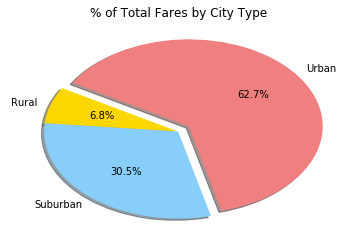

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


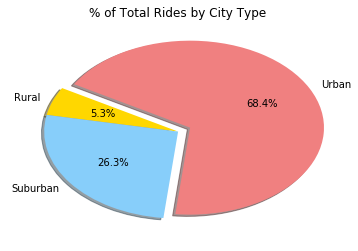

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


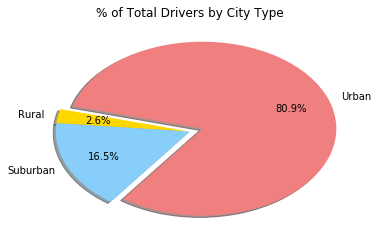

In [6]:
# Show Figure
plt.show()